In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# classifiers
from sklearn import neighbors, metrics, ensemble, svm
# naive bayes classifier
from sklearn.naive_bayes import GaussianNB
# bayesian ridge, linear regression
from sklearn.linear_model import BayesianRidge, LinearRegression
# rvm
from sklearn_rvm import EMRVC
# data split
from sklearn.model_selection import train_test_split, cross_val_score
# standardization
from sklearn.preprocessing import StandardScaler
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay


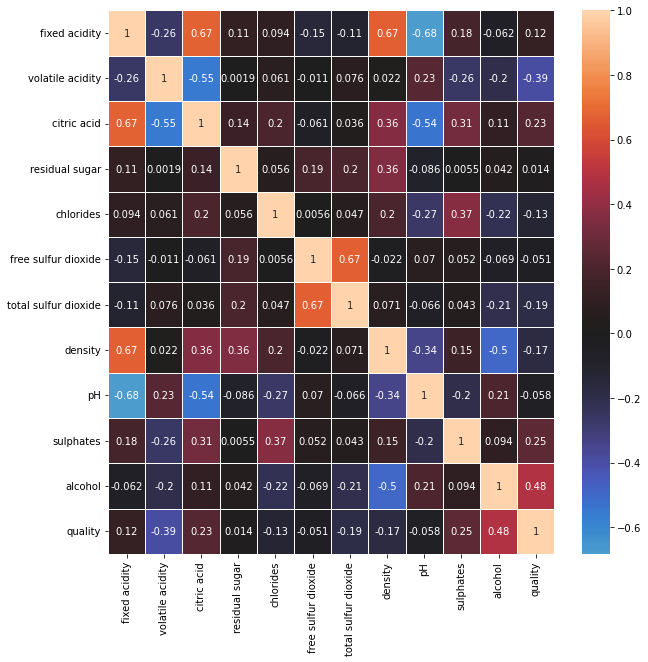

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [4]:
# grid search
from sklearn.model_selection import GridSearchCV
data = pd.read_csv('winequality-red.csv ')
X = data[[
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
]]

pd.options.display.max_columns = 2000
data.corr()['quality']
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0)
plt.show()
print(data.describe())

In [5]:
# target
y= data[['quality']]
y = np.array(y)


# train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
# scale features
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

knn accuracy(before grid search 0.603125
knn accuracy(after grid search):  0.66875


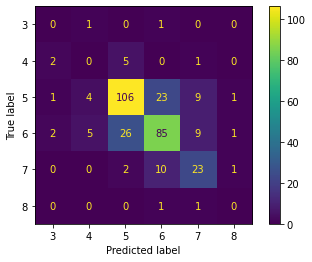

In [15]:
# knn
knn = neighbors.KNeighborsClassifier()
knn.fit(x_train, y_train.ravel())
prediction_knn = knn.predict(x_test)
accuracy_knn = metrics.accuracy_score(y_test, prediction_knn)
# grid search
param_dict = {'n_neighbors':[i for i in range(1,30)]}
knn2 = GridSearchCV(knn,param_grid=param_dict,cv = 6)
knn2.fit(x_train, y_train.ravel())
prediction_knn2 = knn2.predict(x_test)
accuracy_knn2 = metrics.accuracy_score(y_test, prediction_knn2)
disp_knn2=ConfusionMatrixDisplay.from_predictions(y_test,prediction_knn2)

# print("predictions:", prediction)
print("knn accuracy(before grid search", accuracy_knn)
print("knn accuracy(after grid search): ", accuracy_knn2)


random forrest accuracy:  0.709375


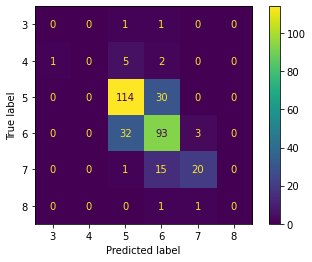

In [16]:
# random forest
rf = ensemble.RandomForestClassifier()
rf.fit(x_train, y_train.ravel())
prediction_rf = rf.predict(x_test)
accuracy_rf = metrics.accuracy_score(y_test, prediction_rf)
# print("predictions:", prediction)
print("random forrest accuracy: ", accuracy_rf)

disp=ConfusionMatrixDisplay.from_predictions(y_test,prediction_rf)

gaussian naive bayes accuracy 0.53125


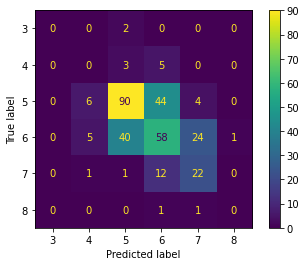

In [14]:
# gaussian naive bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train.ravel())
prediction_gnb = gnb.predict(x_test)
accuracy_gnb = metrics.accuracy_score(y_test, prediction_gnb)
print("gaussian naive bayes accuracy", accuracy_gnb)
disp=ConfusionMatrixDisplay.from_predictions(y_test,prediction_gnb)


bayesian ridge regression accuracy 0.590625
bayesian ridge regression accuracy 0.590625


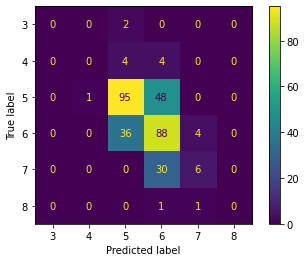

In [17]:
# bayesian ridge regression
br = BayesianRidge()
br.fit(x_train, y_train.ravel())
prediction_br = br.predict(x_test)
prediction_br = np.round(prediction_br)
accuracy_br = metrics.accuracy_score(y_test, prediction_br)
print("bayesian ridge regression accuracy", accuracy_br)
# grid search
bay_params = {'alpha_init':[1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9],
              'lambda_init': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9]}
br2 = GridSearchCV(estimator=BayesianRidge(), param_grid = bay_params, cv = 3, n_jobs=-1)
br2.fit(x_train, y_train.ravel())
prediction_br2 = br.predict(x_test)
prediction_br2 = np.round(prediction_br2)
accuracy_br2 = metrics.accuracy_score(y_test, prediction_br2)
print("bayesian ridge regression accuracy", accuracy_br2)

disp=ConfusionMatrixDisplay.from_predictions(y_test,prediction_br2)

In [10]:
# rvc

rvc = EMRVC(kernel="rbf")
rvc.fit(x_train, y_train.ravel())
prediction_rvc = rvc.predict(x_test)
accuracy_rvc = metrics.accuracy_score(y_test, prediction_rvc)
print("relevance vector machine regression accuracy", accuracy_rvc)

relevance vector machine regression accuracy 0.6375


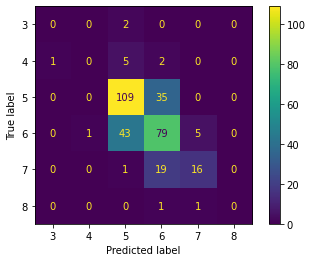

In [13]:
disp=ConfusionMatrixDisplay.from_predictions(y_test,prediction_rvc)

In [18]:
# svc
svc = svm.SVC()
svc.fit(x_train, y_train.ravel())
prediction_svc = svc.predict(x_test)
accuracy_svc = metrics.accuracy_score(y_test, prediction_svc)
# grid search
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(x_train, y_train.ravel())
prediction_svc2 = grid_svc.predict(x_test)
accuracy_svc2 = metrics.accuracy_score(y_test, prediction_svc2)
# print("predictions: ", prediction_svc)
print("svc accuracy(before grid search): ", accuracy_svc)
print("svc accuracy(after grid search): ", accuracy_svc2)

D:\CONDA\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


svc accuracy(before grid search):  0.640625
svc accuracy(after grid search):  0.703125


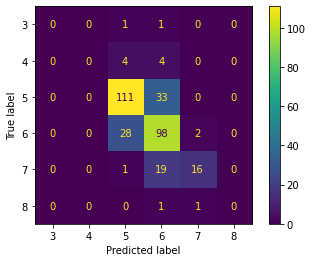

In [19]:
disp=ConfusionMatrixDisplay.from_predictions(y_test,prediction_svc2)